# PROGRAMACIÓN LINEAL: EXAMEN SUSTITUTORIO

In [1]:
import sys
sys.path.insert(0, "..")

import sympy as sp
import numpy as np
from algorithms.simplex_algorithms import *
from algorithms.util2 import print_model
from algorithms.network_flows import *
import matplotlib.pyplot as plt

np.set_printoptions(suppress=True, linewidth=np.nan)
inf = sp.symbols("\\infty")


#### 1. Resuelva el problema de flujo en redes usando $x_{13}, x_{34}$, y $x_{42}$ como parte de una base.

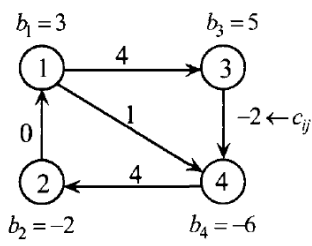

**Solución**

In [2]:
number_nodes = 4
edges: list[Edge] = [Edge(1, 3, 4),
                     Edge(1, 4, 1),
                     Edge(2, 1, 0),
                     Edge(3, 4, -2),
                     Edge(4, 2, 4),
                     Edge(4, inf, 0)]

A = build_matrix(number_nodes, edges)
b = sp.Matrix([3, -2, 5, -6])  # sum(b) = 0
c = sp.Matrix(list(map(lambda e: e.cost, edges)))
var = set(range(len(edges)))


In [3]:
print_model(A, b, c, "x", get_edges(edges, list(var)), ["="] * number_nodes, "min")


In [4]:
basic_var = [0, 3, 4, 5]
non_basic_var = list(var - set(basic_var))

basic_edges = get_edges(edges, basic_var)
non_basic_edges = get_edges(edges, non_basic_var)

print(f"variables básicas\nBI = {basic_var}")
x_sol, w_T, z = calculate_tree(A, b, c, basic_var, non_basic_var)
print_vector("map", "a", [r"x_{%s}" % i for i in basic_var], basic_edges)
print_vector("solución básica (flujos)", "a", x_sol, basic_edges)
print_vector("variable dual", "w", w_T, list(range(1, len(w_T) + 1)))
print_vector("costos no básicos", "w", z, non_basic_edges)


variables básicas
BI = [0, 3, 4, 5]
Matriz B


In [5]:
basic_var = [1, 3, 4, 5]
non_basic_var = list(var - set(basic_var))

basic_edges = get_edges(edges, basic_var)
non_basic_edges = get_edges(edges, non_basic_var)

print(f"variables básicas\nBI = {basic_var}")
x_sol, w_T, z = calculate_tree(A, b, c, basic_var, non_basic_var)
print_vector("map", "a", [r"x_{%s}" % i for i in basic_var], basic_edges)
print_vector("solución básica (flujos)", "a", x_sol, basic_edges)
print_vector("variable dual", "w", w_T, list(range(1, len(w_T) + 1)))
print_vector("costos no básicos", "w", z, non_basic_edges)



variables básicas
BI = [1, 3, 4, 5]
Matriz B


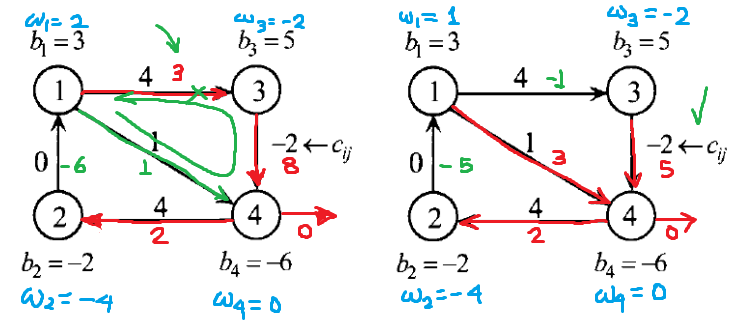

#### 2. Considere el siguiente modelo LO

\begin{align*}
\max \quad 2x_1 &- x_2&\\
\text{s.t.}\quad    x_1& - x_2& \le 1\\
                    x_1& - x_2& \ge 2\\
\end{align*}

$$x_1, x_2\ge 0$$

Muestre que ambos este modelo y su dual son infactibles.

**Solución**

Graficamente se observa que la region es vacía.

#### 3. Considere el siguiente modelo LO

\begin{align*}
\max (1 + δ)x_1& +& x_2&\\
\text{s.t.}\quad \quad \quad   {}& {}& x_2& \le 5\\
2x_1& +& x_2& \le 8\\
3x_1& +& x_2& \le 10
\end{align*}

$$x_1, x_2 \ge 0$$

**Solución**

In [6]:
def pivoting_symbolic(tableau: np.ndarray, row: int, col: int) -> np.ndarray:
    # escale pivot row min to 1.0
    tableau[row, :] = tableau[row, :] / tableau[row, col]
    # pivot proccess: convert al column to zero except row
    for k in range(tableau.shape[0]):
        if k != row:
            tableau[k, :] = tableau[k, :] - tableau[k, col] * tableau[row, :]


def correct_symbolic_cost(tableau: np.ndarray, basic_var: list[int]) -> None:
    # correct basic variable cost with value distict of zero
    for index, col in enumerate(basic_var):
        row = index + 1
        tableau[0, :] = tableau[0, :] - tableau[0, col] * tableau[row, :]
    print(f"Cost corrected")


In [7]:
A = [[0, 1, 1, 0, 0],
     [2, 1, 0, 1, 0],
     [3, 1, 0, 0, 1.]]

b = [5, 8, 10.]

c = lambda delta: [delta + 1., 1, 0, 0, 0]

delta = sp.symbols("\\delta")

In [8]:
basic_var = [2, 3, 4]

tableau = build_tableau(A, b, c(0))
print("Simplex process")
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(delta)).T
opt_tableau[0, -1] = 0
print("Perturbation")
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
display(sp.nsimplify(opt_tableau, rational=True))


Simplex process
vertex = [ 0.  0.  5.  8. 10.], x_B = [3, 4, 5]
[[ 1.  1.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  5.]
 [ 2.  1.  0.  1.  0.  8.]
 [ 3.  1.  0.  0.  1. 10.]]
vertex = [3.33333333 0.         5.         1.33333333 0.        ], x_B = [3, 4, 1]
[[ 0.          0.66666667  0.          0.         -0.33333333 -3.33333333]
 [ 0.          1.          1.          0.          0.          5.        ]
 [ 0.          0.33333333  0.          1.         -0.66666667  1.33333333]
 [ 1.          0.33333333  0.          0.          0.33333333  3.33333333]]
vertex = [2. 4. 1. 0. 0.], x_B = [3, 2, 1]
[[ 0.  0.  0. -2.  1. -6.]
 [ 0.  0.  1. -3.  2.  1.]
 [ 0.  1.  0.  3. -2.  4.]
 [ 1.  0.  0. -1.  1.  2.]]
vertex = [1.5 5.  0.  0.  0.5], x_B = [5, 2, 1]
[[ 0.   0.  -0.5 -0.5  0.  -6.5]
 [ 0.   0.   0.5 -1.5  1.   0.5]
 [ 0.   1.   1.   0.   0.   5. ]
 [ 1.   0.  -0.5  0.5  0.   1.5]]
Perturbation


Matrix([
[\delta + 1.0,   1,    0,    0,   0,                 0],
[           0,   0,  0.5, -1.5, 1.0, 0.500000000000001],
[           0, 1.0,  1.0,    0,   0,               5.0],
[         1.0,   0, -0.5,  0.5,   0,               1.5]])

Cost corrected


Matrix([
[0, 0, \delta/2 - 1/2, -\delta/2 - 1/2, 0, -3*\delta/2 - 13/2],
[0, 0,            1/2,            -3/2, 1,                1/2],
[0, 1,              1,               0, 0,                  5],
[1, 0,           -1/2,             1/2, 0,                3/2]])

In [9]:
basic_var = [2, 3, 4]

tableau = build_tableau(A, b, c(1))
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(delta)).T
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)


vertex = [ 0.  0.  5.  8. 10.], x_B = [3, 4, 5]
[[ 2.  1.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  5.]
 [ 2.  1.  0.  1.  0.  8.]
 [ 3.  1.  0.  0.  1. 10.]]
vertex = [3.33333333 0.         5.         1.33333333 0.        ], x_B = [3, 4, 1]
[[ 0.          0.33333333  0.          0.         -0.66666667 -6.66666667]
 [ 0.          1.          1.          0.          0.          5.        ]
 [ 0.          0.33333333  0.          1.         -0.66666667  1.33333333]
 [ 1.          0.33333333  0.          0.          0.33333333  3.33333333]]
vertex = [2. 4. 1. 0. 0.], x_B = [3, 2, 1]
[[ 0.  0.  0. -1.  0. -8.]
 [ 0.  0.  1. -3.  2.  1.]
 [ 0.  1.  0.  3. -2.  4.]
 [ 1.  0.  0. -1.  1.  2.]]


Matrix([
[\delta + 1.0,   1,   0,    0,    0,   0],
[           0,   0, 1.0, -3.0,  2.0, 1.0],
[           0, 1.0,   0,  3.0, -2.0, 4.0],
[         1.0,   0,   0, -1.0,  1.0, 2.0]])

Cost corrected


Matrix([
[0, 0, 0, \delta - 2, 1 - \delta, -2*\delta - 6],
[0, 0, 1,         -3,          2,             1],
[0, 1, 0,          3,         -2,             4],
[1, 0, 0,         -1,          1,             2]])

In [10]:
basic_var = [2, 3, 4]

tableau = build_tableau(A, b, c(2))
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(delta)).T
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)


vertex = [ 0.  0.  5.  8. 10.], x_B = [3, 4, 5]
[[ 3.  1.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  5.]
 [ 2.  1.  0.  1.  0.  8.]
 [ 3.  1.  0.  0.  1. 10.]]
vertex = [3.33333333 0.         5.         1.33333333 0.        ], x_B = [3, 4, 1]
[[  0.           0.           0.           0.          -1.         -10.        ]
 [  0.           1.           1.           0.           0.           5.        ]
 [  0.           0.33333333   0.           1.          -0.66666667   1.33333333]
 [  1.           0.33333333   0.           0.           0.33333333   3.33333333]]


Matrix([
[\delta + 1.0,                 1,   0,   0,                  0,                0],
[           0,               1.0, 1.0,   0,                  0,              5.0],
[           0, 0.333333333333333,   0, 1.0, -0.666666666666667, 1.33333333333333],
[         1.0, 0.333333333333333,   0,   0,  0.333333333333333, 3.33333333333333]])

Cost corrected


Matrix([
[0, 2/3 - \delta/3, 0, 0, -\delta/3 - 1/3, -10*\delta/3 - 10/3],
[0,              1, 1, 0,               0,                   5],
[0,            1/3, 0, 1,            -2/3,                 4/3],
[1,            1/3, 0, 0,             1/3,                10/3]])

In [11]:
basic_var = [2, 3, 4]

tableau = build_tableau(A, b, c(-1))
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(delta)).T
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)


vertex = [ 0.  0.  5.  8. 10.], x_B = [3, 4, 5]
[[ 0.  1.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  5.]
 [ 2.  1.  0.  1.  0.  8.]
 [ 3.  1.  0.  0.  1. 10.]]
vertex = [0. 5. 0. 3. 5.], x_B = [2, 4, 5]
[[ 0.  0. -1.  0.  0. -5.]
 [ 0.  1.  1.  0.  0.  5.]
 [ 2.  0. -1.  1.  0.  3.]
 [ 3.  0. -1.  0.  1.  5.]]


Matrix([
[\delta + 1.0,   1,    0,   0,   0,   0],
[           0, 1.0,  1.0,   0,   0, 5.0],
[         2.0,   0, -1.0, 1.0,   0, 3.0],
[         3.0,   0, -1.0,   0, 1.0, 5.0]])

Cost corrected


Matrix([
[\delta + 1, 0, -1, 0, 0, -5],
[         0, 1,  1, 0, 0,  5],
[         2, 0, -1, 1, 0,  3],
[         3, 0, -1, 0, 1,  5]])

**Gráfico**

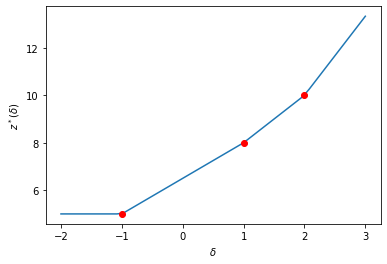

In [12]:
def z(delta):
    if delta < -1:
        return 5
    elif -1 <= delta < 1:
        return (3 * delta + 13) / 2
    elif 1 <= delta <= 2:
        return 2 * delta + 6   # f'(0) = 4.5
    else:
        return 10 / 3 * (delta + 1)


interval_point = [-1, 1, 2]
z_point = [z(d) for d in interval_point]

interval = np.linspace(-2, 3)
z_plot = [z(d) for d in interval]

plt.xlabel("$\delta$")
plt.ylabel("$z^*(\delta)$")
plt.plot(interval, z_plot)
plt.plot(interval_point, z_point, 'o', c='r')
plt.show()
